# Face Recognition with OpenCV Built-in Library

In [55]:
import cv2 as cv
import os
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [56]:
# Loading Haarcascade and Photos
people = ['Jake', 'Leonardo', 'Olsen', 'Will']
DIR = r'/Users/atanushome/Documents/Learning/OpenCVtutorial/OpenCV-with-Python-Learning/Photos/FaceRecog/'

haar_cascade = cv.CascadeClassifier('Classifier/haar_face.xml')

In [57]:
features = []
labels = []

def create_train():
    for person in people:
        path = os.path.join(DIR, person)
        label = people.index(person)
        
        # Read each image in a directory
        for img in os.listdir(path):
            img_path = os.path.join(path,img)

            img_array = cv.imread(img_path)
            if img_array is None:
                continue 
                
            gray = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)

            faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

            for (x,y,w,h) in faces_rect:
                faces_roi = gray[y:y+h, x:x+w]
                features.append(faces_roi)
                labels.append(label)

In [58]:
create_train()
print('Training done ---------------')
print(f'Length of the features = {len(features)}')
print(f'Length of the labels = {len(labels)}')

Training done ---------------
Length of the features = 84
Length of the labels = 84


In [59]:
# Create model and save model
features = np.array(features, dtype='object')
labels = np.array(labels)

face_recognizer = cv.face.LBPHFaceRecognizer_create()

# Train the Recognizer on the features list and the labels list
face_recognizer.train(features,labels)

face_recognizer.save('/Users/atanushome/Documents/Learning/OpenCVtutorial/OpenCV-with-Python-Learning/SavedModel/face_trained.yml')
np.save('/Users/atanushome/Documents/Learning/OpenCVtutorial/OpenCV-with-Python-Learning/SavedModel/features.npy', features)
np.save('/Users/atanushome/Documents/Learning/OpenCVtutorial/OpenCV-with-Python-Learning/SavedModel/labels.npy', labels)

### This saved model can be loaded later and used. It can be loaded into a different file. 

## Test the Model

Reloading the model is not needed within the same file. But I'm doing it just to practise. 

In [60]:
face_recognizer = cv.face.LBPHFaceRecognizer_create()
face_recognizer.read('/Users/atanushome/Documents/Learning/OpenCVtutorial/OpenCV-with-Python-Learning/SavedModel/face_trained.yml')

In [61]:
img = cv.imread("Photos/TestFaceRecog/will3.jpg")

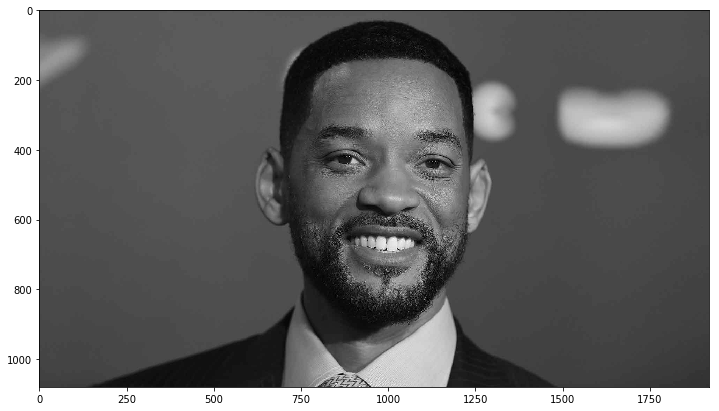

In [62]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#Show the image with matplotlib
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()

In [63]:
# Detect the face in the image
faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 4)

In [64]:
for (x,y,w,h) in faces_rect:
    faces_roi = gray[y:y+h,x:x+w]

    label, confidence = face_recognizer.predict(faces_roi)
    print(f'Label = {people[label]} with a confidence of {confidence}')

    cv.putText(img, str(people[label]), (100,200), cv.FONT_HERSHEY_COMPLEX, 5, (0,255,0), thickness=3)
    cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)

Label = Will with a confidence of 35.63720907683017


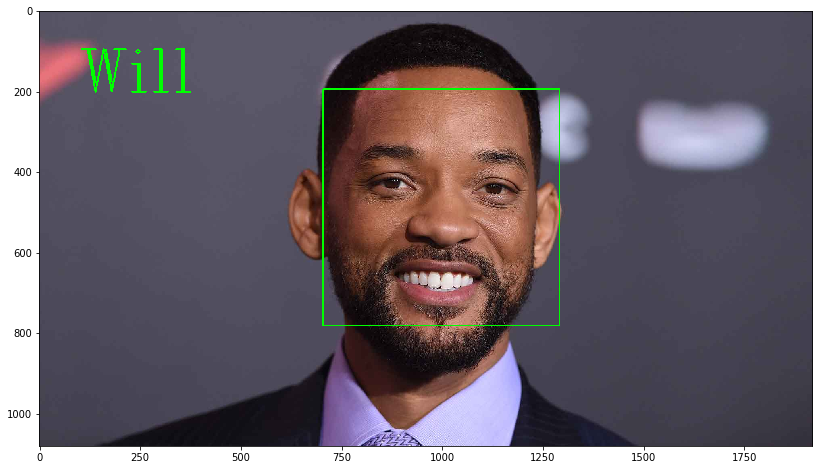

In [67]:
RGB_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(14,8))
plt.imshow(RGB_img)
plt.show()